<a href="https://colab.research.google.com/github/Emirhan-Ates/DataModelingUsingPython/blob/main/5yearsDailyBTC_USDModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [33]:
url = "https://raw.githubusercontent.com/Emirhan-Ates/DataModelingUsingPython/main/BTC-USD.csv"
data = pd.read_csv(url, encoding="unicode_escape")
data = data.sort_values('Date', ascending = True)
print(str(np.min(data['Date'])), "/", str(np.max(data['Date'])))
data

2018-05-27 / 2023-05-27


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-27,7362.080078,7381.740234,7270.959961,7368.220215,7368.220215,4056519936
1,2018-05-28,7371.310059,7419.049805,7100.890137,7135.990234,7135.990234,5040600064
2,2018-05-29,7129.459961,7526.419922,7090.680176,7472.589844,7472.589844,5662660096
3,2018-05-30,7469.729980,7573.770020,7313.600098,7406.520020,7406.520020,4922540032
4,2018-05-31,7406.149902,7608.899902,7361.129883,7494.169922,7494.169922,5127130112
...,...,...,...,...,...,...,...
1822,2023-05-23,26855.960938,27434.683594,26816.179688,27225.726563,27225.726563,13697203143
1823,2023-05-24,27224.603516,27224.603516,26106.576172,26334.818359,26334.818359,16299104428
1824,2023-05-25,26329.460938,26591.519531,25890.593750,26476.207031,26476.207031,13851122697
1825,2023-05-26,26474.181641,26916.669922,26343.949219,26719.291016,26719.291016,12711619225


In [34]:
fig = go.Figure([go.Scatter(x=data['Date'], y=data['Close'])])
fig.update_layout(template = 'plotly_dark')
fig.add_traces(go.Scatter(
               x = data['Date'],
               y = data['Close'],
               marker = dict(color = 'yellow')))

fig.show()

In [35]:
data['1WeekMovingAverage'] = data['Close'].rolling(window = 7).mean()
data['1MonthMovingAverage'] = data['Close'].rolling(window = 30).mean()
data['1YearMovingAverage'] = data['Close'].rolling(window = 365).mean()
fig = go.Figure(data = [go.Candlestick(x = data['Date'],
                                       open = data['Open'],
                                       high = data['High'],
                                       low = data['Low'],
                                       close = data['Close'])])
fig.add_trace(
    go.Scatter(
        x = data['Date'],
        y = data['1WeekMovingAverage'],
        line = dict(color = 'blue'),
        name = "1 Week Moving Average"
    ))

fig.add_trace(
    go.Scatter(
        x = data['Date'],
        y = data['1MonthMovingAverage'],
        line = dict(color = 'yellow'),
        name = "1 Month Moving Average"
    ))

fig.add_trace(
    go.Scatter(
        x = data['Date'],
        y = data['1YearMovingAverage'],
        line = dict(color = 'red'),
        name = "1 Year Moving Average"
    ))


fig.update_layout(
    width=1400,
    height=800,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_dark",
    yaxis_title = "BTC Price (USD)",
                  xaxis_title = 'Date'
    
)
fig.show()


In [36]:
data = data[["Close"]]
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) 'x' days up
data['Prediction'] = data[['Close']].shift(-future_days)
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(data.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 7368.220215]
 [ 7135.990234]
 [ 7472.589844]
 ...
 [29268.806641]
 [28091.568359]
 [28680.537109]]


<ipython-input-36-31e58931dd64>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-31e58931dd64>:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [37]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' days
y = np.array(data['Prediction'])[:-future_days]
print(y)

[ 6729.740234  6083.689941  6162.47998  ... 26476.207031 26719.291016
 26714.644531]


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [39]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [40]:
x_future = data.drop(['Prediction'], 1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-40-609c8358cd2d>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



array([[29006.308594],
       [28847.710938],
       [29534.384766],
       [28904.623047],
       [28454.978516],
       [27694.273438],
       [27658.775391],
       [27621.755859],
       [27000.789063],
       [26804.990234],
       [26784.078125],
       [26930.638672],
       [27192.693359],
       [27036.650391],
       [27398.802734],
       [26832.208984],
       [26890.128906],
       [27129.585938],
       [26753.826172],
       [26851.277344],
       [27225.726563],
       [26334.818359],
       [26476.207031],
       [26719.291016],
       [26714.644531]])

In [41]:
lr.score(x_test, y_test) 

0.9120131116767655

In [42]:
tree.score(x_test, y_test)

0.8660062653347594

In [43]:
#Showing the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Showing the linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[32366.392578 26930.638672 20553.271484 29906.662109 28307.597656
 29340.261719 29340.261719 26890.128906 30139.052734 21637.587891
 21637.587891 30139.052734 27276.910156 33005.761719 30235.058594
 21637.587891 30139.052734 27276.910156 21637.587891 21637.587891
 27276.910156 35547.75     35547.75     21637.587891 21637.587891]

[29064.72230428 28913.72347691 29567.49696529 28967.90877787
 28539.80789274 27815.55018524 27781.75294254 27746.50711317
 27155.29246098 26968.87486614 26948.964711   27088.50315875
 27338.00212009 27189.43557894 27534.2362557  26994.78949462
 27049.93432162 27277.91834073 26920.16220821 27012.9442396
 27369.45261686 26521.23015577 26655.84452658 26887.28172189
 26882.85786214]


<ipython-input-44-bca61c3caa8a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



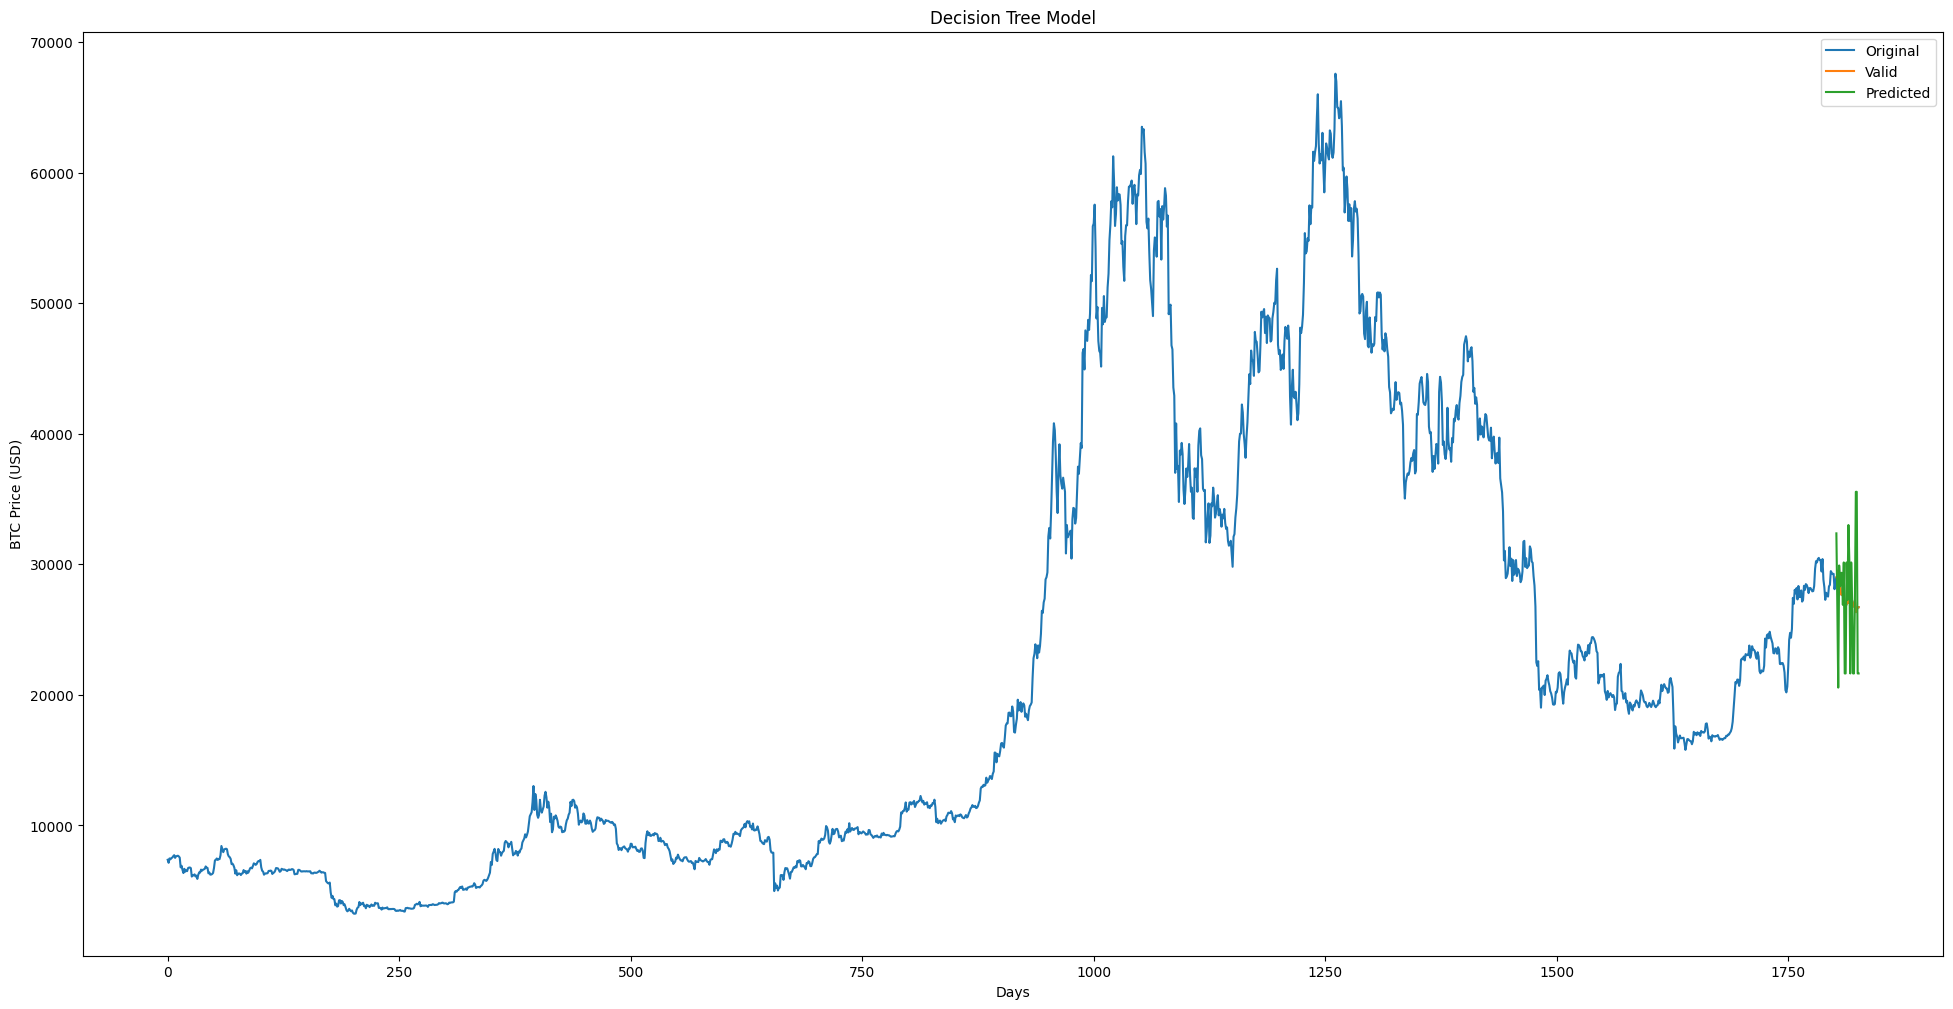

In [44]:
#Visualize the data
predictions = tree_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(24,12))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('BTC Price (USD)')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])

<ipython-input-45-36827a29c41a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



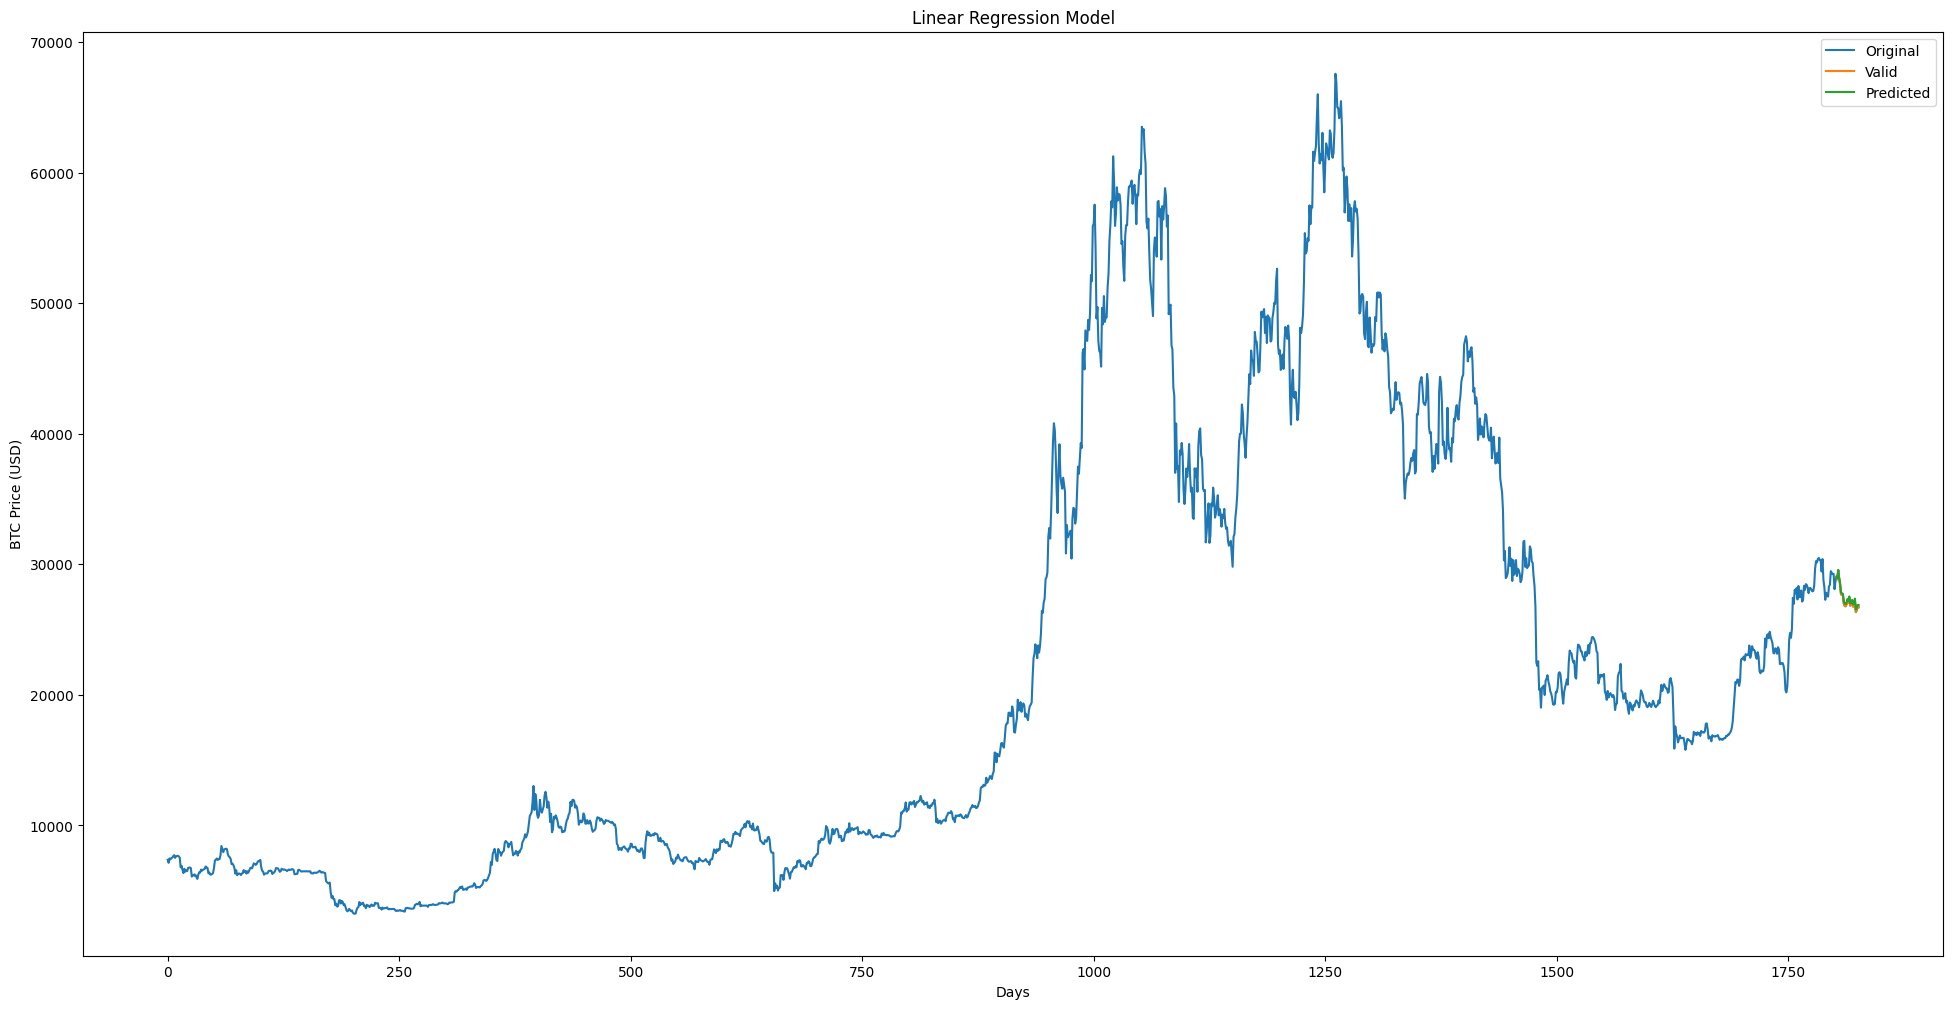

In [45]:
#Visualize linear regression
predictions = lr_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(24,12)) 
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('BTC Price (USD)')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])